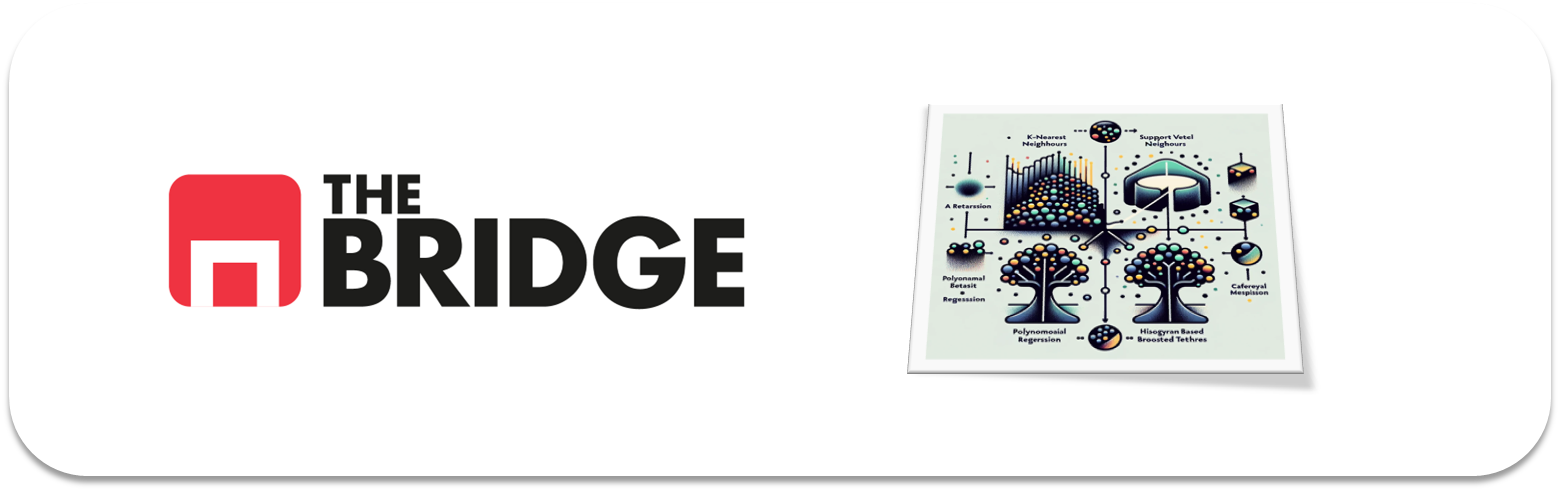

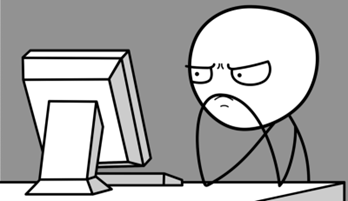

Para ejercitarte y afianzar lo aprendido sobre **Otros Modelos de aprendizaje supervisado**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import bootcampviztools as booty

## PARTE 1. KNN

En la primera parte  vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating (ojo, no el sentimiento), en función del sentimiento del comentario y su valor y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

### Ejercicio 1

Lee el archivo de entrada "reviews_sentiment.csv" y carga su contenido en un dataframe. Muestras sus primeras líneas, su información general y define una variable "target" asignándole el nombre de la columna que contenga el target del problema. 

In [3]:
df = pd.read_csv('./data/reviews_sentiment.csv', sep=';')
df.head()

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [7]:
target = 'Star Rating'

### Ejericicio 2

Muestra la distribución del target y coméntala brevemente.

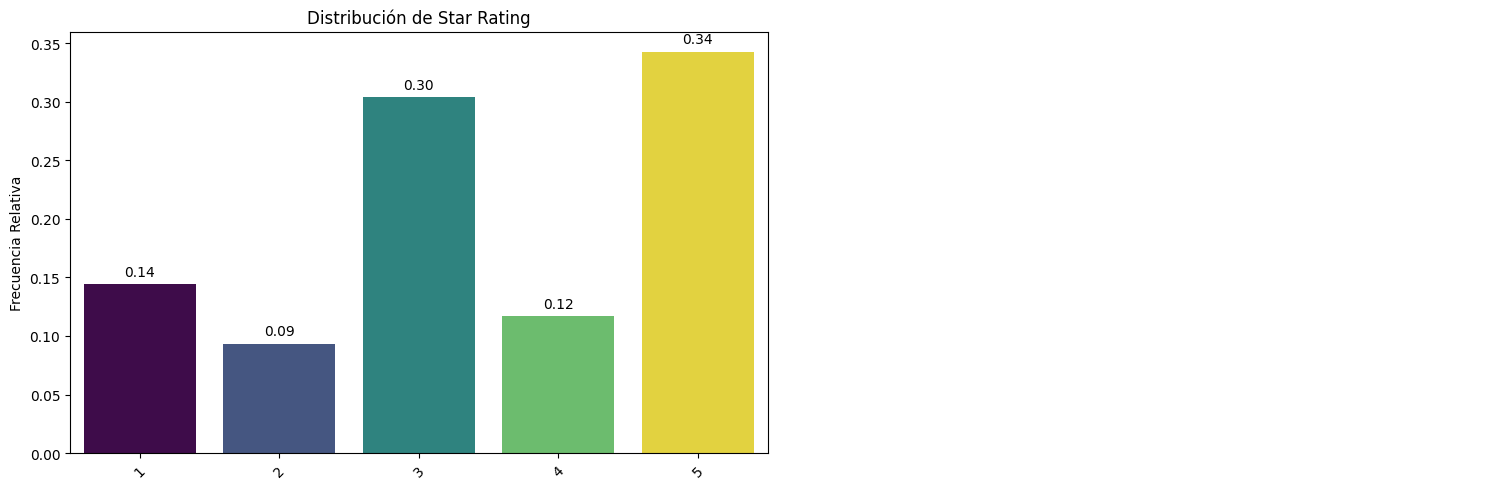

In [8]:
booty.pinta_distribucion_categoricas(df, [target], mostrar_valores=True, relativa=True)

- unbalanced
- may need to do some transformations to balance dataset for more precise models.

### Ejercicio 3

Deshazte de la columna "titleSentiment" que tiene nulos y no vamos a emplearla.

In [9]:
df.drop('titleSentiment', axis=1, inplace=True)

### Ejercicio 4

Haz el split en train y test.

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

### Ejercicio 5

Muestra la descripción de las variables que consideres numéricas (justificando tu elección) y sus histogramas. ¿Hay que aplicar alguna transformación o tratamiento? (Recuerda que vamos a emplear un KNN)

array([[<Axes: title={'center': 'wordcount'}>,
        <Axes: title={'center': 'Star Rating'}>],
       [<Axes: title={'center': 'sentimentValue'}>, <Axes: >]],
      dtype=object)

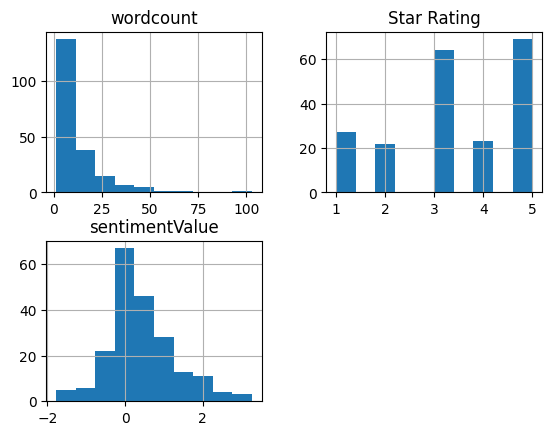

In [12]:
train_set.hist()

In [13]:
train_set.describe()

,wordcount,Star Rating,sentimentValue
count,205.000000,205.000000,205.000000
mean,11.209756,3.414634,0.400269
std,12.875341,1.389308,0.871054
min,1.000000,1.000000,-1.780889
25%,3.000000,3.000000,-0.106498
50%,7.000000,3.000000,0.244713
75%,15.000000,5.000000,0.813521
max,103.000000,5.000000,3.264579


In [11]:
num_features = ['wordcount','sentimentValue']

- wordcount
    - unknown limit to amount of words. Could be as many as the reviewers decides to write.
- sentimentValue
    - massive range of values
- X NOT X star rating as is target and 1 - 5 so categorical ordinal

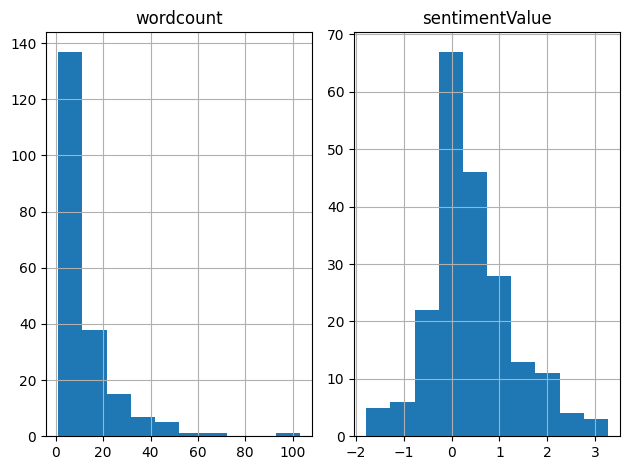

In [15]:
train_set[num_features].hist()
plt.tight_layout()

In [33]:
train_set[num_features].describe()

,wordcount,sentimentValue
count,205.000000,205.000000
mean,11.209756,0.400269
std,12.875341,0.871054
min,1.000000,-1.780889
25%,3.000000,-0.106498
50%,7.000000,0.244713
75%,15.000000,0.813521
max,103.000000,3.264579


### Ejercicio 6

Muestra la distribución frecuencial de las variables que consideres categóricas. ¿Habrías que hacerles algún tipo de tratamiento?

In [16]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 75 to 102
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    205 non-null    object 
 1   Review Text     205 non-null    object 
 2   wordcount       205 non-null    int64  
 3   textSentiment   205 non-null    object 
 4   Star Rating     205 non-null    int64  
 5   sentimentValue  205 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 11.2+ KB


In [17]:
cat_features = ['textSentiment']

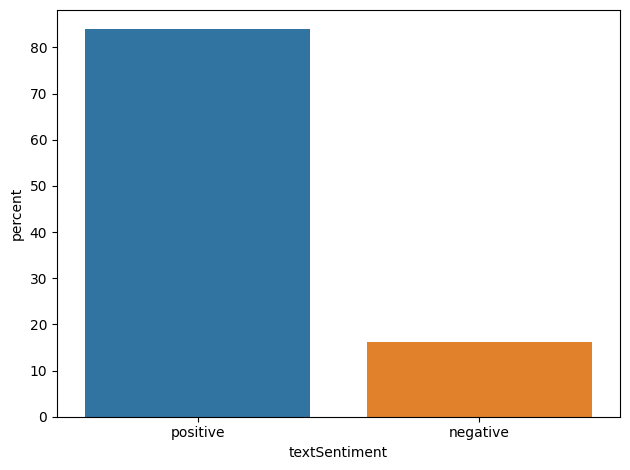

In [30]:
sns.countplot(train_set, x='textSentiment', hue='textSentiment', stat='percent')
plt.tight_layout()

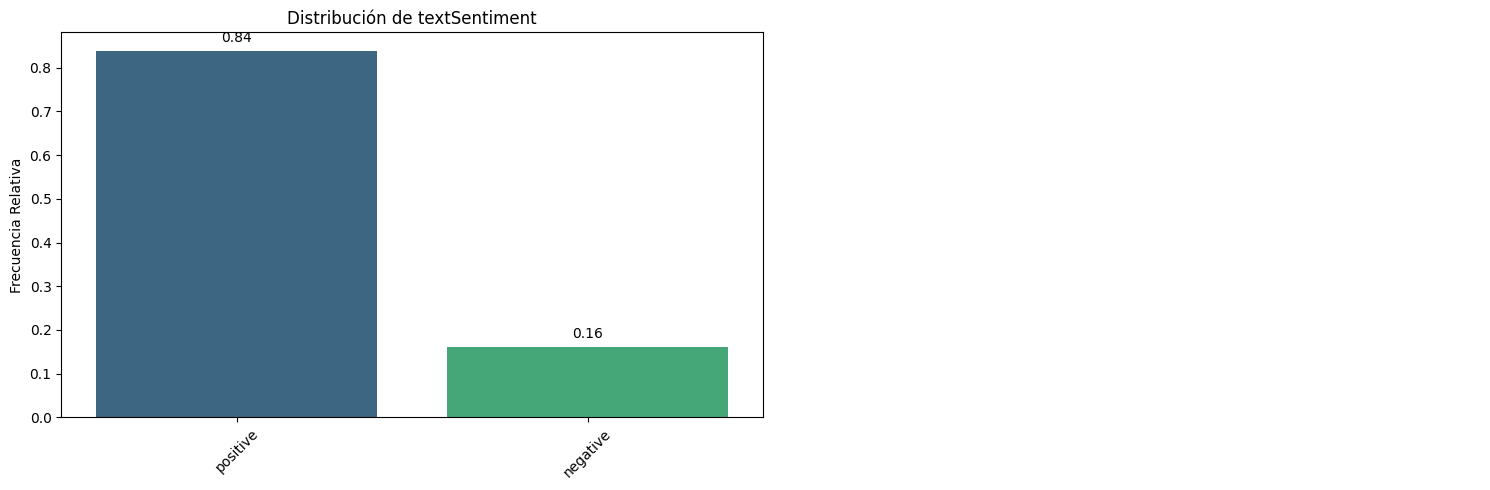

In [31]:
booty.pinta_distribucion_categoricas(train_set, cat_features, mostrar_valores=True, relativa=True)

### Ejercicio 7

En un modelado completo habríamos comprobado la relación entre las features y el targer, para estos ejercicios, las vamos a incluir sí o si. Haz el tratamiento de features, haciendo la conversión ordinal de la binaria (usa 1 para positive y 0 para negative) y aplicando el escalado que creas más conveniente en consecuencia para las numéricas

In [34]:
train_set['textSentiment'] = train_set['textSentiment'].apply(lambda x: 1 if x == 'positive' else 0)
test_set['textSentiment'] = test_set['textSentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
minmax = MinMaxScaler()

train_set_scaler = train_set.copy()
test_set_scaler = test_set.copy()

train_set_minmax = train_set.copy()
test_set_minmax = test_set.copy()

In [36]:
train_set_scaler[num_features] = scaler.fit_transform(train_set_scaler[num_features])
test_set_scaler[num_features] = scaler.transform(test_set_scaler[num_features])

train_set_minmax[num_features] = minmax.fit_transform(train_set_minmax[num_features])
test_set_minmax[num_features] = minmax.transform(test_set_minmax[num_features])

### Ejercicio 8

Crea el juego X,y de train y test. Carga el modelo, instancialo con un k=5 para empezar y entrénalo.

In [40]:
X_train_scaler = train_set_scaler[num_features + cat_features]
y_train_scaler = train_set_scaler[target]
X_test_scaler = test_set_scaler[num_features + cat_features]
y_test_scaler = test_set_scaler[target]

X_train_minmax = train_set_minmax[num_features + cat_features]
y_train_minmax = train_set_minmax[target]
X_test_minmax = test_set_minmax[num_features + cat_features]
y_test_minmax = test_set_minmax[target]

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn_scaler = KNeighborsClassifier(n_neighbors=5)
knn_scaler.fit(X_train_scaler, y_train_scaler)

KNeighborsClassifier()

In [42]:
knn_minmax = KNeighborsClassifier(n_neighbors=5)
knn_minmax.fit(X_train_minmax, y_train_minmax)

KNeighborsClassifier()

### Ejercicio 9

Evalúalo contra el propio train y contra test, ¿qué puedes decir de los resultados?

---
### StandardScaler()
---

In [45]:
from sklearn.metrics import classification_report

y_preds_train = knn_scaler.predict(X_train_scaler)
print("Train Classification Report")
print(classification_report(y_train_scaler, y_preds_train))
print()
y_preds_test = knn_scaler.predict(X_test_scaler)
print("Test Classification Report")
print(classification_report(y_test_scaler, y_preds_test))

Train Classification Report
              precision    recall  f1-score   support

           1       0.93      0.96      0.95        27
           2       0.95      0.86      0.90        22
           3       0.87      0.94      0.90        64
           4       0.94      0.70      0.80        23
           5       0.93      0.96      0.94        69

    accuracy                           0.91       205
   macro avg       0.92      0.88      0.90       205
weighted avg       0.91      0.91      0.91       205


Test Classification Report
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.50      1.00      0.67         2
           3       0.86      0.86      0.86        14
           4       1.00      0.71      0.83         7
           5       1.00      0.95      0.97        19

    accuracy                           0.88        52
   macro avg       0.84      0.88      0.84        52
weighted avg       0.

---
### MinMax()
---

In [46]:
y_preds_train_minmax = knn_minmax.predict(X_train_minmax)
print("Train Classification Report")
print(classification_report(y_train_minmax, y_preds_train_minmax))
print()
y_preds_test_minmax = knn_minmax.predict(X_test_minmax)
print("Test Classification Report")
print(classification_report(y_test_minmax, y_preds_test_minmax))

Train Classification Report
              precision    recall  f1-score   support

           1       0.93      0.96      0.95        27
           2       0.95      0.86      0.90        22
           3       0.88      0.94      0.91        64
           4       0.94      0.70      0.80        23
           5       0.93      0.97      0.95        69

    accuracy                           0.92       205
   macro avg       0.93      0.89      0.90       205
weighted avg       0.92      0.92      0.92       205


Test Classification Report
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.50      1.00      0.67         2
           3       0.86      0.86      0.86        14
           4       1.00      0.43      0.60         7
           5       0.90      0.95      0.92        19

    accuracy                           0.85        52
   macro avg       0.82      0.83      0.78        52
weighted avg       0.

- in general terms both look pretty good at generalizing.
- standardscaler model slightly better but with a significant improvement to recall of class 4 and no loss in precision.
    - high precision does not penalise recall so harshly in this class.
    - class 2 still the same with low precision helping to boost high recall.

Going to continue to tweak both models although obviously if i had to choose to continue with only one it would be standad scaler model. lets see if that changes...

### Ejercicio 10

Vamos a "ajustar a mano" el valor de K, probando diferentes valores entre 1 y 20. Para ello haz un bucle que cambie el valor de K y obtenga mediante validación cruzada el valor del "balanced accuracy" para cada "modelo" y se quede con el k que mejor métrica obtenga. Luego entrena un modelo para ese k y evalúalo contra el target.

In [48]:
from sklearn.model_selection import cross_val_score

bal_acc_scores_scaler = []
for k in range(1,21):
    model = KNeighborsClassifier(n_neighbors=k)
    bal_acc = np.mean(cross_val_score(model, X_train_scaler, y_train_scaler, cv=5, scoring='balanced_accuracy'))
    bal_acc_scores_scaler.append(bal_acc)
    print(f'For K = {k}, mean recall: {bal_acc}')
print(f'Best K value: {np.argmax(bal_acc_scores_scaler) + 1}')

For K = 1, mean recall: 0.8687179487179486
For K = 2, mean recall: 0.8407912087912088
For K = 3, mean recall: 0.8517655677655677
For K = 4, mean recall: 0.8393186813186814
For K = 5, mean recall: 0.8411868131868131
For K = 6, mean recall: 0.8311868131868131
For K = 7, mean recall: 0.8424835164835164
For K = 8, mean recall: 0.8524835164835164
For K = 9, mean recall: 0.8424835164835164
For K = 10, mean recall: 0.8442637362637363
For K = 11, mean recall: 0.8205494505494505
For K = 12, mean recall: 0.8262637362637362
For K = 13, mean recall: 0.8154065934065933
For K = 14, mean recall: 0.8234065934065933
For K = 15, mean recall: 0.8154065934065933
For K = 16, mean recall: 0.8004835164835165
For K = 17, mean recall: 0.8184835164835164
For K = 18, mean recall: 0.8164835164835165
For K = 19, mean recall: 0.8164835164835165
For K = 20, mean recall: 0.8084835164835165
Best K value: 1


- Best K value for standard scaler model: k=1
---

In [53]:
best_scaler_model = KNeighborsClassifier(n_neighbors=1)
best_scaler_model.fit(X_train_scaler, y_train_scaler)

KNeighborsClassifier(n_neighbors=1)

In [54]:
y_preds_scaler_best = best_scaler_model.predict(X_test_scaler)
print(classification_report(y_test_scaler, y_preds_scaler_best))

              precision    recall  f1-score   support

           1       0.75      0.90      0.82        10
           2       0.40      1.00      0.57         2
           3       1.00      0.71      0.83        14
           4       1.00      0.43      0.60         7
           5       0.86      1.00      0.93        19

    accuracy                           0.83        52
   macro avg       0.80      0.81      0.75        52
weighted avg       0.88      0.83      0.82        52



---
---

In [52]:
bal_acc_scores_minmax = []
for k in range(1,21):
    model = KNeighborsClassifier(n_neighbors=k)
    bal_acc = np.mean(cross_val_score(model, X_train_minmax, y_train_minmax, cv=5, scoring='balanced_accuracy'))
    bal_acc_scores_minmax.append(bal_acc)
    print(f'For K = {k}, mean recall: {bal_acc}')
print(f'Best K value: {(np.argmax(bal_acc_scores_minmax)) + 1}')

For K = 1, mean recall: 0.8507179487179487
For K = 2, mean recall: 0.8575824175824176
For K = 3, mean recall: 0.8667765567765567
For K = 4, mean recall: 0.8561758241758242
For K = 5, mean recall: 0.8522637362637362
For K = 6, mean recall: 0.8291868131868132
For K = 7, mean recall: 0.8422637362637364
For K = 8, mean recall: 0.8242637362637362
For K = 9, mean recall: 0.7974065934065935
For K = 10, mean recall: 0.8002637362637361
For K = 11, mean recall: 0.793120879120879
For K = 12, mean recall: 0.7822637362637362
For K = 13, mean recall: 0.7822637362637362
For K = 14, mean recall: 0.7853406593406594
For K = 15, mean recall: 0.7724835164835164
For K = 16, mean recall: 0.7542637362637363
For K = 17, mean recall: 0.7544835164835165
For K = 18, mean recall: 0.7544835164835165
For K = 19, mean recall: 0.7464835164835165
For K = 20, mean recall: 0.7484835164835164
Best K value: 3


- best k value for minmax model: k=3
---

In [55]:
best_minmax_model = KNeighborsClassifier(n_neighbors=3)
best_minmax_model.fit(X_train_minmax, y_train_minmax)

KNeighborsClassifier(n_neighbors=3)

In [56]:
y_preds_minmax_best = best_minmax_model.predict(X_test_minmax)
print(classification_report(y_test_minmax, y_preds_minmax_best))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80        10
           2       0.40      1.00      0.57         2
           3       1.00      0.86      0.92        14
           4       1.00      0.43      0.60         7
           5       0.86      1.00      0.93        19

    accuracy                           0.85        52
   macro avg       0.81      0.82      0.76        52
weighted avg       0.89      0.85      0.84        52



### Ejercicio 11

Repasa la ficha de KNN o la documentación de sklearn y, usando un grid y una estrategia completa (GridSearch), busca la mejor combinación de k y weights que puedas, empleando de nuevo "balanced_accuracy" como métrica.

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1,20),
    'weights': ['uniform','distance']
}

knn_grid_scaler = GridSearchCV(knn_scaler,
                               param_grid=param_grid,
                               cv = 5,
                               scoring = 'balanced_accuracy')

knn_grid_scaler.fit(X_train_scaler, y_train_scaler)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']},
             scoring='balanced_accuracy')

In [63]:
print(f'Best Params: {knn_grid_scaler.best_params_}')
print(f'Best Score: {knn_grid_scaler.best_score_}')
best_preds = knn_grid_scaler.best_estimator_.predict(X_test_scaler)
print('Classification Report:')
print(classification_report(y_test_scaler, best_preds))

Best Params: {'n_neighbors': 1, 'weights': 'uniform'}
Best Score: 0.8687179487179486
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.90      0.82        10
           2       0.40      1.00      0.57         2
           3       1.00      0.71      0.83        14
           4       1.00      0.43      0.60         7
           5       0.86      1.00      0.93        19

    accuracy                           0.83        52
   macro avg       0.80      0.81      0.75        52
weighted avg       0.88      0.83      0.82        52



---
---

In [64]:
param_grid = {
    'n_neighbors': range(1,20),
    'weights': ['uniform','distance']
}

knn_grid_minmax = GridSearchCV(knn_minmax,
                               param_grid=param_grid,
                               cv = 5,
                               scoring = 'balanced_accuracy')

knn_grid_minmax.fit(X_train_minmax, y_train_minmax)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']},
             scoring='balanced_accuracy')

In [65]:
print(f'Best Params: {knn_grid_minmax.best_params_}')
print(f'Best Score: {knn_grid_minmax.best_score_}')
best_preds = knn_grid_minmax.best_estimator_.predict(X_test_minmax)
print('Classification Report:')
print(classification_report(y_test_minmax, best_preds))

Best Params: {'n_neighbors': 3, 'weights': 'uniform'}
Best Score: 0.8667765567765567
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.80      0.80        10
           2       0.40      1.00      0.57         2
           3       1.00      0.86      0.92        14
           4       1.00      0.43      0.60         7
           5       0.86      1.00      0.93        19

    accuracy                           0.85        52
   macro avg       0.81      0.82      0.76        52
weighted avg       0.89      0.85      0.84        52

